In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stat  

import copy

pd.pandas.set_option('display.max_columns', None)

# Car Price Analysis

* Read in the dataset `car_prices.csv`
* Run info and describe DataFrame methods to get a quick understanding of the data.

In [3]:
cars = pd.read_csv("../Data/car_prices.csv", on_bad_lines='skip')

In [4]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# Looking for missing values

* Using isna() to find na values in dataset and comparing them in pct chart using comprahension list
* Column 'transmission' include highest rate of missing data

In [7]:
cars_na = [var for var in cars.columns if cars[var].isna().sum()>0]

In [8]:
cars_na

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'condition',
 'odometer',
 'color',
 'interior']

In [9]:
cars_pct_na = cars[cars_na].isnull().mean().sort_values(ascending = False)

In [10]:
cars_pct_na

transmission    0.116950
body            0.023613
condition       0.021106
trim            0.019060
model           0.018609
make            0.018434
color           0.001340
interior        0.001340
odometer        0.000168
dtype: float64

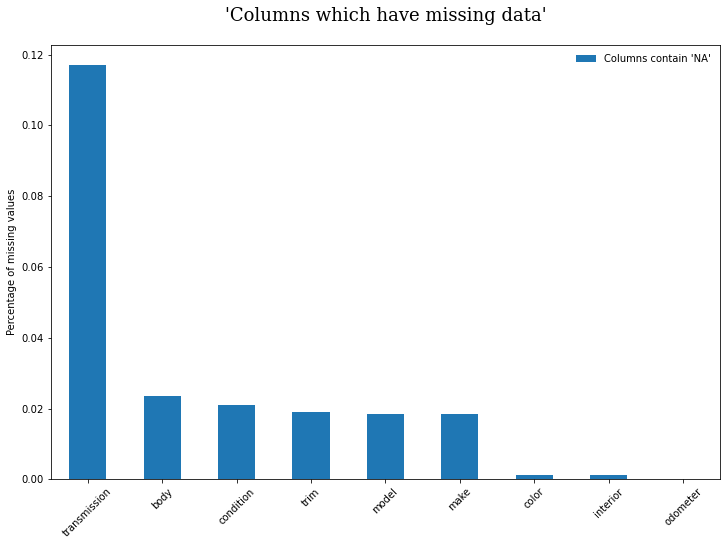

In [11]:
fig, ax = plt.subplots(figsize = (12,8))


cars_pct_na.plot.bar(
    label = "Columns contain 'NA'",
)

plt.xticks( rotation = 45)
plt.title("'Columns which have missing data'", fontsize = 18, fontfamily = 'serif', y= 1.04),
plt.ylabel('Percentage of missing values')

ax.legend(loc = 'upper right', frameon = False)
plt.show()

# Changing the dtypes() to save memory

* Saving 30mb only changing object column into categorical

In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [13]:
cars.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [14]:
cars = cars.astype(
    {
        'make':'category',
        'model':'category',
        'trim':'category',
        'body':'category',
        'transmission':'category',
        'state':'category',
        'color':'category',
        'interior':'category'       
    }
)

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          558811 non-null  int64   
 1   make          548510 non-null  category
 2   model         548412 non-null  category
 3   trim          548160 non-null  category
 4   body          545616 non-null  category
 5   transmission  493458 non-null  category
 6   vin           558811 non-null  object  
 7   state         558811 non-null  category
 8   condition     547017 non-null  float64 
 9   odometer      558717 non-null  float64 
 10  color         558062 non-null  category
 11  interior      558062 non-null  category
 12  seller        558811 non-null  object  
 13  mmr           558811 non-null  int64   
 14  sellingprice  558811 non-null  int64   
 15  saledate      558811 non-null  object  
dtypes: category(8), float64(2), int64(3), object(3)
memory usage: 39.6+ MB


## Finding relationship between missing data and sellingprice

* The absence of missing values in the transmission variable did not have a substantial impact on the selling price of the vehicles in the dataset.

In [28]:
def analyse(df,var):
    df = copy.deepcopy(df)
    df[var] = np.where(df[var].isnull(),1,0)
    tmp = df.groupby(var)['sellingprice'].agg(['mean','std'])
    tmp.plot(kind = 'barh', y = 'mean', xerr = 'std', title = 'saleprice')
plt.show()

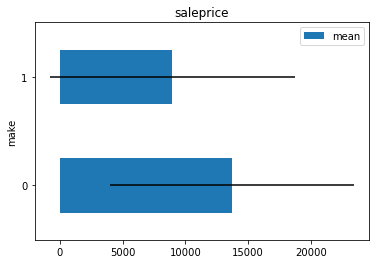

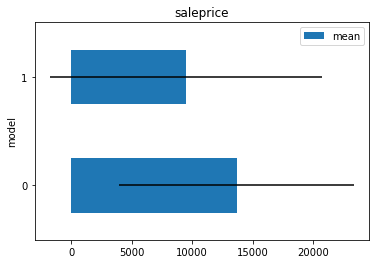

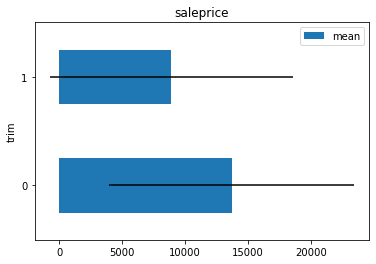

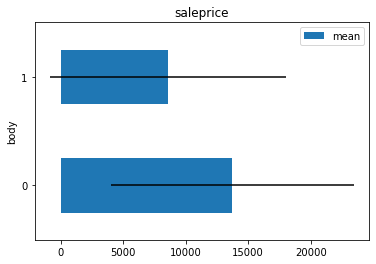

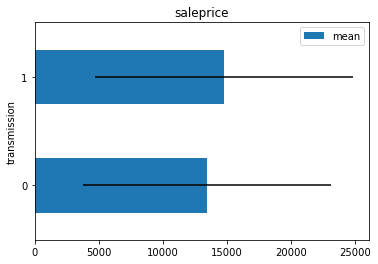

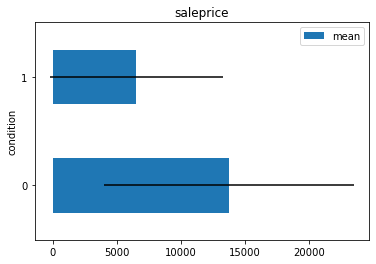

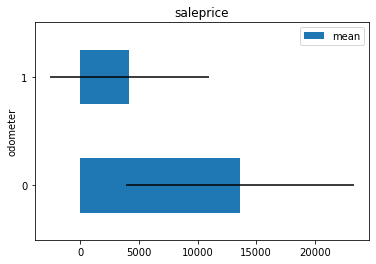

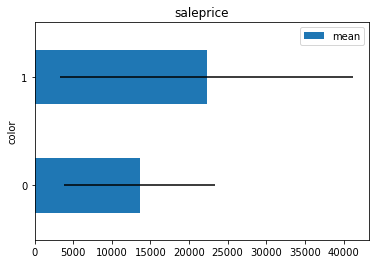

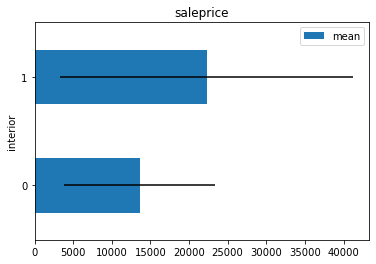

In [29]:
for var in cars_na:
    analyse(cars,var)

# Numeric Variable Relationships

* Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset.

## Quick view:

- Sellingprice is the most related to mmr( recommended selling price )

    The reason MMR is so closely related to the selling price of a vehicle is that it provides a fairly accurate estimate of what the vehicle is worth on the open market. Dealers and other buyers use MMR as a benchmark for determining what they are willing to pay for a used car, and sellers use it as a guide for setting their asking price.
    

- Selling price is related also with year that car was manufactured and bought, as newer car is then higher price is.


- Other is when we compare sellingprice with odometer and condition. Seems obvious that when car make more kilometer than market selling price with drop down and as higher condition is that selling price will rise.



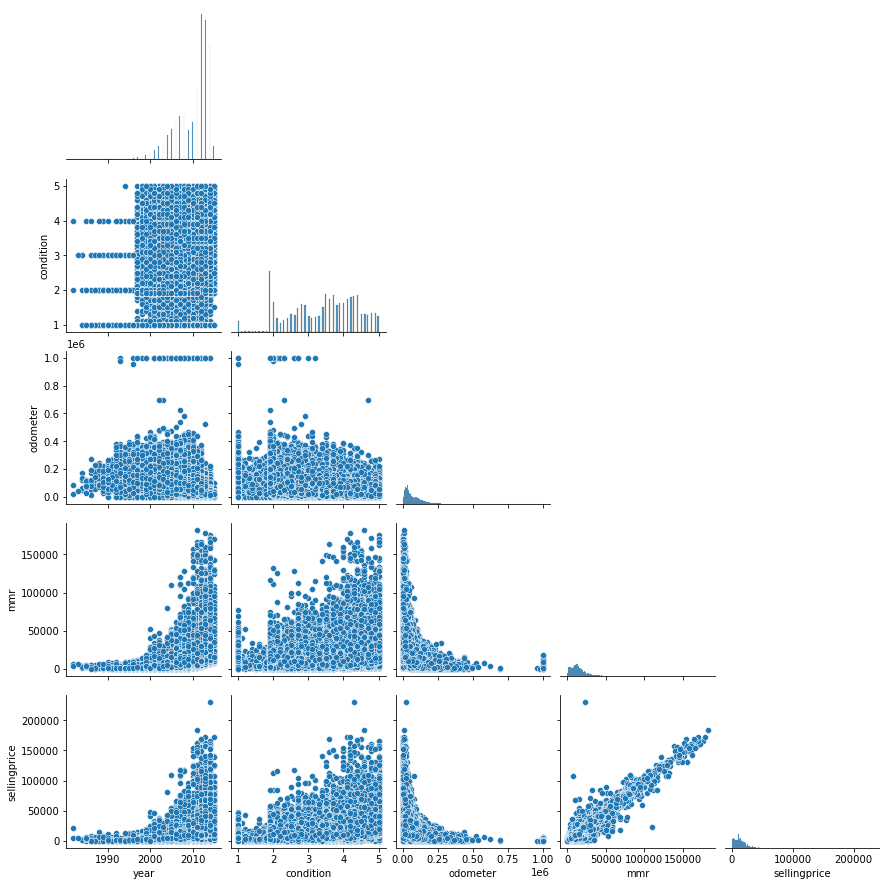

In [30]:
sns.pairplot(
    cars,
    diag_kind = 'hist',
    corner = True
)

In [31]:
cars['body'].value_counts().head(10)

Sedan          241343
SUV            143844
Hatchback       21380
Minivan         21363
Coupe           14602
Wagon           13630
Crew Cab        13280
Convertible      8652
SuperCrew        7423
G Sedan          5999
Name: body, dtype: int64

## During observation found that in data could be potential type letter mistake

* Replacing 'suv' with 'SUV' and 'sedan' with 'Sedan'

In [32]:
cars['body'] = cars.loc[:,'body'].replace({'suv':'SUV','sedan':'Sedan'})

In [33]:
cars['body'].value_counts().head(10)

Sedan          241343
SUV            143844
Hatchback       21380
Minivan         21363
Coupe           14602
Wagon           13630
Crew Cab        13280
Convertible      8652
SuperCrew        7423
G Sedan          5999
Name: body, dtype: int64

In [19]:
top_5_body = ['Sedan', 'SUV','Hatchback','Minivan','Coupe']

In [233]:
top3 = list(cars['body'].value_counts().iloc[:3].index)

* Now i will look closer into top3 body types

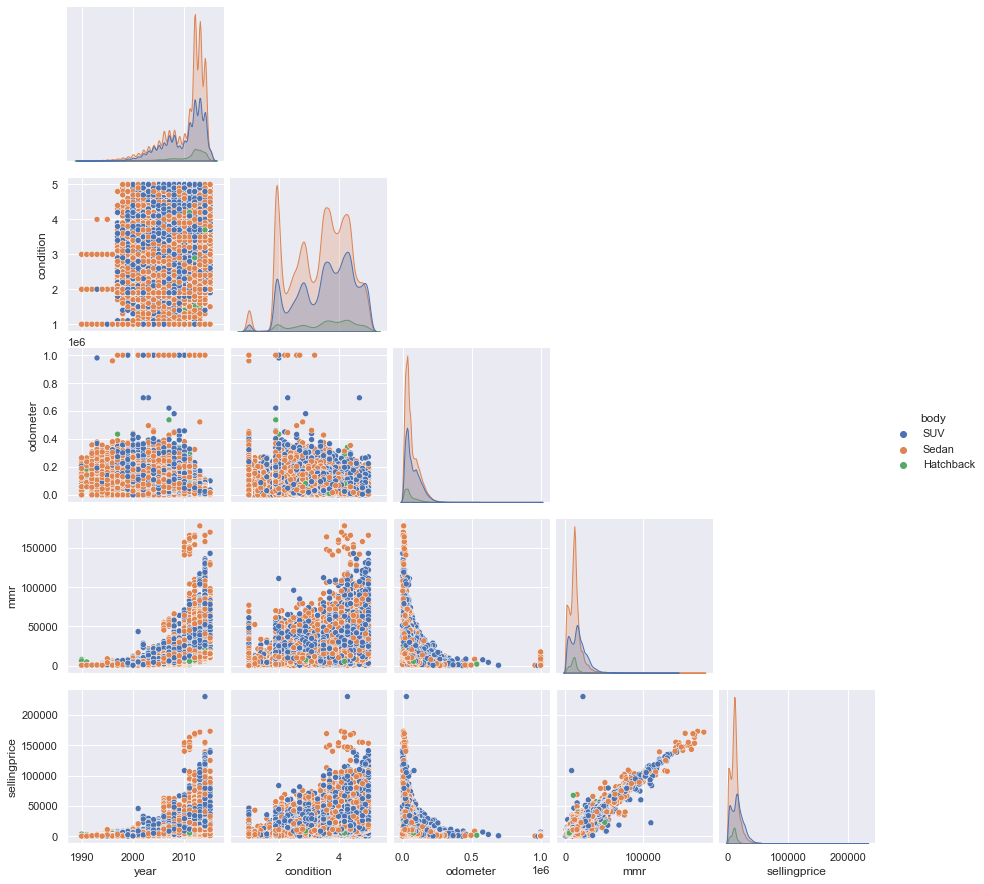

In [234]:
sns.pairplot(
    cars.query("body == @top3"),
    diag_kind = 'kde',
    corner = True,
    hue = 'body'
)

plt.show()

# Correlation Heat Map

* Using .corr() func to find correlation between variables
* As we could expect there is minus correlation between odometer and ['year','condition']

<AxesSubplot:>

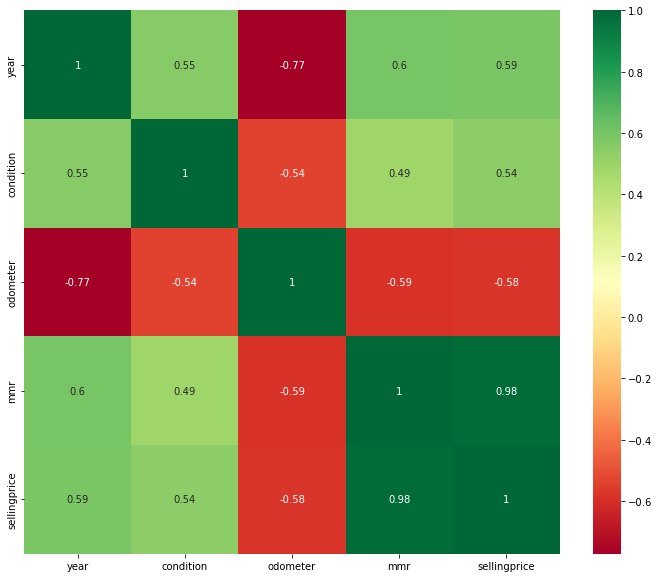

In [37]:
fig, ax = plt.subplots(figsize = (12,10))

sns.heatmap(
    cars.corr(),
    cmap = 'RdYlGn',
    annot = True
)

# Analyzing the Most Sold Cars to Identify the Brand with the Slowest Price Decline during Odometer Growth

* The negative correlation coefficient values indicate that as the odometer reading increases, the selling price decreases for all the car brands. This is a common trend in the used car market, as higher mileage is generally associated with greater wear and tear on the vehicle.


* Toyota is the brand which sellingprice drop slowest comparing to rest top_5 selling brands
* Ford in other hand have the fastes drop selling price comparing to odometer.

In [38]:
top_5_brands = cars['make'].value_counts()

In [39]:
top_5_brandss = list(top_5_brands.iloc[:5].index)

In [40]:
top_5_brandss

['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge']

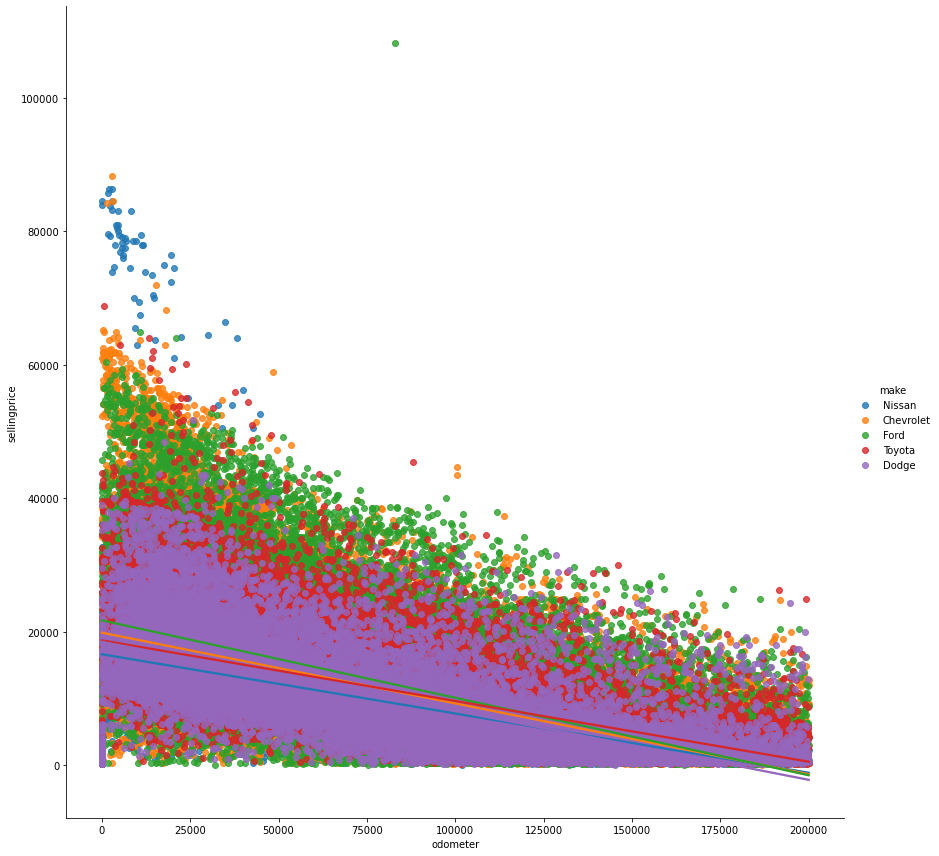

In [41]:
sns.lmplot(
    x = 'odometer',
    y = 'sellingprice',
    data = cars.query("make == @top_5_brandss and sellingprice < 200000 and odometer < 200000"),
    hue = 'make',
    height = 12
)

In [42]:
cars_regres = cars.dropna()

stat.linregress(x = cars_regres['odometer'], y=cars_regres['sellingprice'])

LinregressResult(slope=-0.10686305954841561, intercept=20818.284085956504, rvalue=-0.5773849819198622, pvalue=0.0, stderr=0.00021987650761310973, intercept_stderr=18.587962282863646)

In [43]:
for brand in top_5_brandss:
    reg = cars_regres.loc[cars_regres['make'] == brand]
    print(f"{brand}:{stat.linregress(x = reg['odometer'], y = reg['sellingprice'])[:2]}")

Ford:(-0.09953734771818888, 20840.011075886523)
Chevrolet:(-0.08841045962774961, 18705.587357485063)
Nissan:(-0.07890514111720326, 16183.04165200102)
Toyota:(-0.07594777614361674, 17813.017107685304)
Dodge:(-0.08386378575350481, 17077.781907004726)


# Analyzing the SellingPrice vs odometer for top 5 selling price brands

* Bentley has the strongest negative correlation coefficient, indicating that there is a stronger relationship between odometer and selling price for Bentley cars compared to the other brands. On the other hand, Acura has the weakest correlation coefficient, indicating a weaker relationship between odometer and selling price for Acura cars.

In [44]:
top_5_selling = list(cars.groupby('make').agg({'sellingprice':'mean'}).iloc[:5].index)

In [45]:
top_5_selling

['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley']

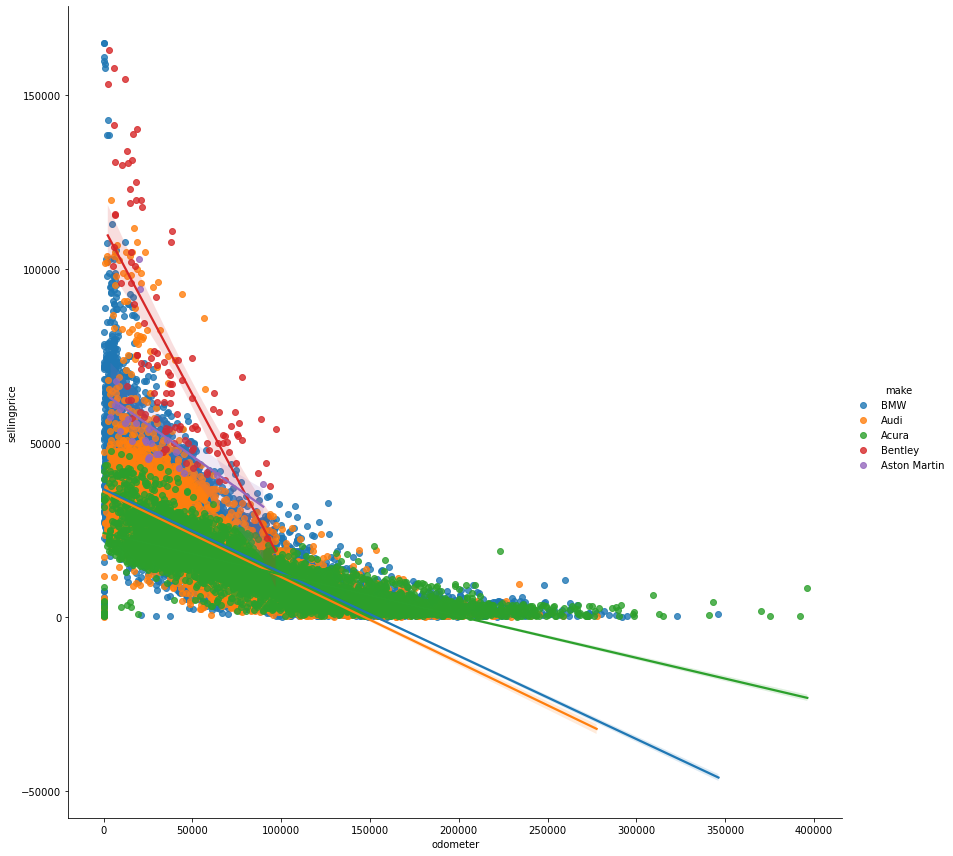

In [46]:
sns.lmplot(
    x = 'odometer',
    y = 'sellingprice',
    data = cars.query("make == @ top_5_selling and odometer < 400000"),
    hue = 'make',
    height = 12
)

 ## * The box plot is an excellent tool to visually represent descriptive statistics of a given dataset. It can show the range, interquartile range, median, mode, outliers, and all quartiles.

<AxesSubplot:xlabel='make', ylabel='sellingprice'>

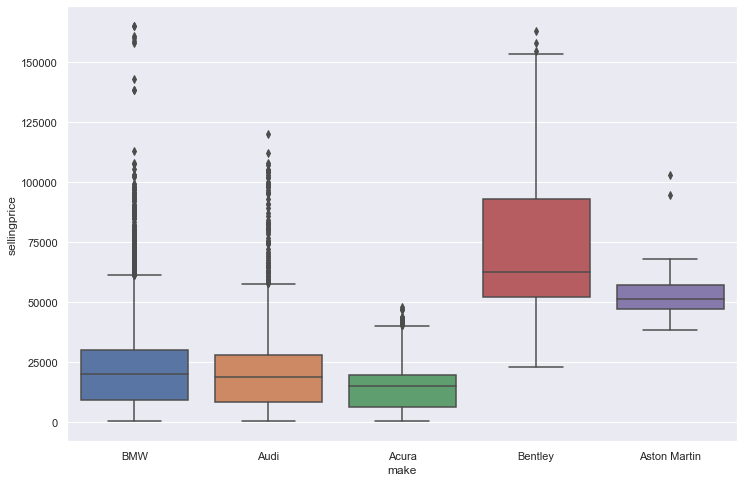

In [54]:
sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(
    x = 'make',
    y = 'sellingprice',
    data = cars.query("make == @top_5_selling ").sort_values(by = 'sellingprice')
)

In [55]:
bmw = cars[cars['make'] == 'BMW']['sellingprice']
audi = cars[cars['make'] == 'Audi']['sellingprice']
acura= cars[cars['make'] == 'Acura']['sellingprice']
bentley = cars[cars['make'] == 'Bentley']['sellingprice']
aston = cars[cars['make'] == 'Aston Martin']['sellingprice']

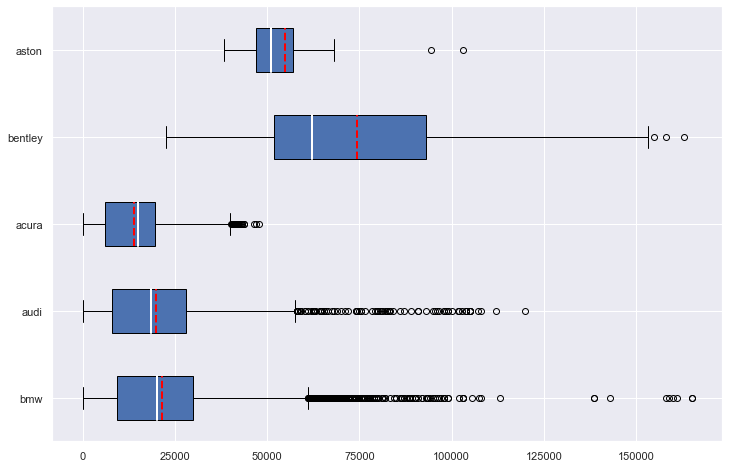

In [56]:
fig, ax = plt.subplots()
ax.boxplot((bmw, audi, acura, bentley, aston), vert=False, showmeans=True, meanline=True,
           labels=('bmw', 'audi', 'acura', 'bentley', 'aston'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'white'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()


In [48]:
for brand in top_5_selling:
    reg = cars_regres.loc[cars_regres['make'] == brand]
    print(f"{brand}:{stat.linregress(x = reg['odometer'], y = reg['sellingprice'] / 1000000)[:2]}")

Acura:(-1.1815164684961387e-07, 0.02410205707183525)
Aston Martin:(-4.536969149083793e-07, 0.06637367834345663)
Audi:(-2.5130347051499267e-07, 0.03645024108119149)
BMW:(-2.2250330429676324e-07, 0.03556797974468479)
Bentley:(-8.87756839162471e-07, 0.10821858473257064)


# Categorical Variable Relationships

* Bin the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* Build a barplot of the average price by condition bin.

In [57]:
## Wanted to find average price by condition

cars['condition_bin'] = pd.cut(
    cars['condition'],
    bins = np.linspace(1, 5, 9),
    labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]
)

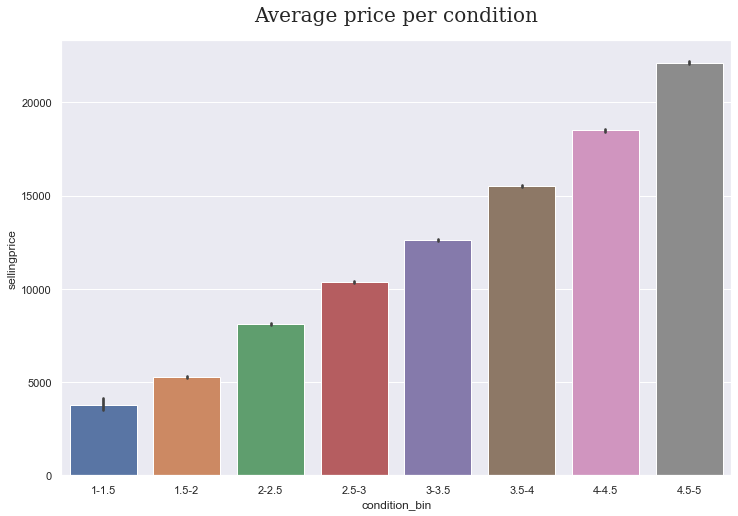

In [64]:
## putting condition bins into barplot


fig, ax = plt.subplots(figsize = (12,8))

sns.barplot(
    x = 'condition_bin',
    y = 'sellingprice',
    data = cars.sort_values(by = 'condition_bin', ascending = True)
)

ax.set_title('Average price per condition', fontsize = 20, fontfamily = 'serif', y = 1.03)

plt.show()

# Price by make and condition

* Create a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table will be the average selling price for each make/condition combination. 

* Build a heatmap from the data. Which brands and quality levels have the highest selling prices? 

### Clearly see that highest price and highest condition corelate most with BMW, CHEVROLET AND FORD

In [59]:
top_10 = list(cars['make'].value_counts().iloc[:10].index)

In [60]:
top_10

['Ford',
 'Chevrolet',
 'Nissan',
 'Toyota',
 'Dodge',
 'Honda',
 'Hyundai',
 'BMW',
 'Kia',
 'Chrysler']

In [61]:
condition_pivot = (cars.query("make == @top_10").
                       pivot_table(
                               index = 'make',
                               columns = 'condition_bin',
                               values = 'sellingprice',
                               aggfunc = 'mean'
                       )
    
)

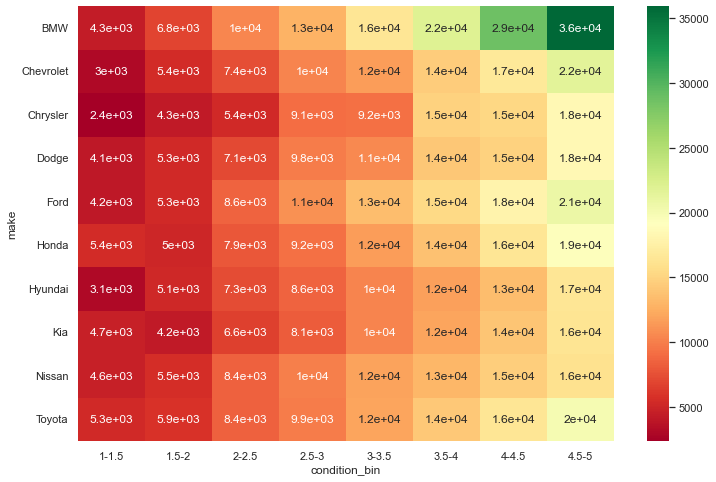

In [63]:
sns.set(rc={'figure.figsize':(12,8)})

sns.heatmap(
    condition_pivot,
    annot = True,
    cmap = 'RdYlGn',
    
)
plt.show()

# Ford F-150 Deep Dive

Ford F-150 and Altima are the highest selling automobile for decades in the US. On that analisys i choose F-150 model which seems to be more famous

* Filter your data down to rows where `model` is "F-150".
* Then build a histogram of sellingprice with 10 bins. 

In [157]:
top5_models = list(cars['model'].value_counts().iloc[:5].index)

In [154]:
top5_models

['Altima', 'F-150', 'Fusion', 'Camry', 'Escape']

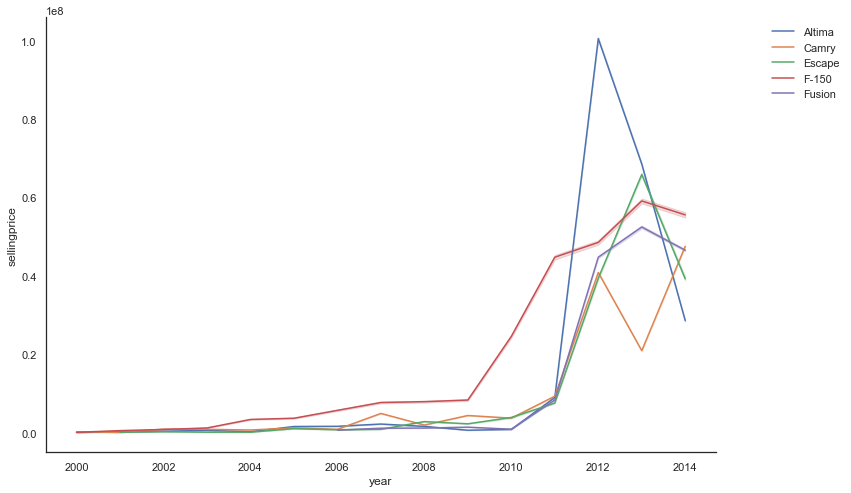

In [165]:

sns.lineplot(
    data = cars.query("year <=2014 and year >= 2000 and model == @top5_models"),
    x = cars['year'],
    y = 'sellingprice',
    estimator = sum,
    hue = 'model'
)
plt.legend(bbox_to_anchor=(1.2,1), frameon = False)
sns.despine()

In [167]:
ford_150 = cars.query("model == 'F-150'")
ford_150.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bin
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4


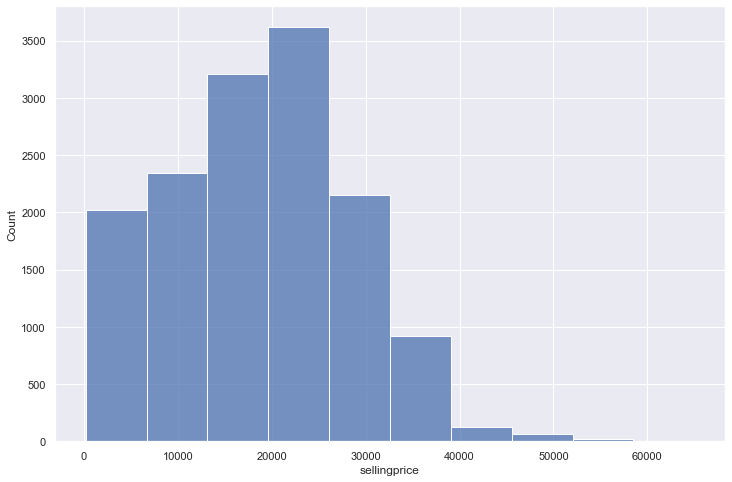

In [74]:
sns.histplot(
    x = 'sellingprice',
    data = ford_150,
    bins = 10,
)
plt.show()

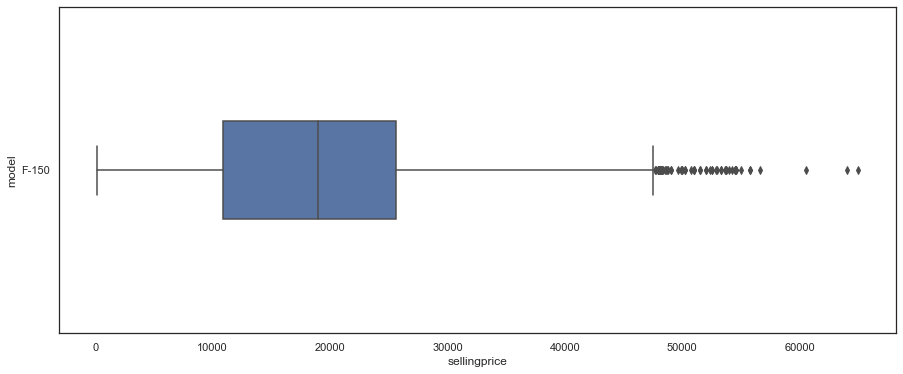

In [180]:
plt.figure(figsize = (15,6))
sns.boxplot(
    x = 'sellingprice',
    y = 'model',
    data = ford_150,
    width = .3
)
plt.show()

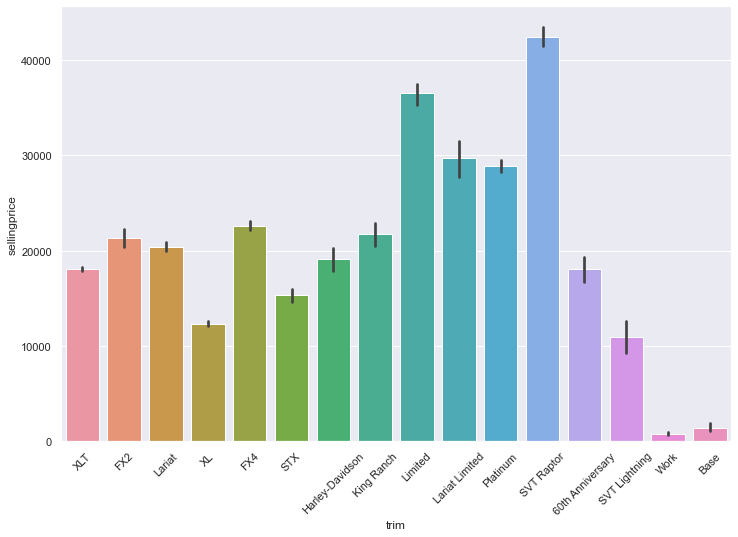

In [84]:
## Making barplot() to visualize selling average price by top_10 trim

sns.barplot(
    x = 'trim',
    y = 'sellingprice',
    data = ford_150
)

ax.set_title('Average price by trim', fontsize = 25, fontfamily = 'serif', y=1.03)
plt.xticks(rotation = 45)

plt.show()



   * Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"]

   * Then, build a jointplot of condition (not binned) by sellingprice.



In [85]:
ford_150['trim'].value_counts()

XLT                 6637
XL                  2251
Lariat              2012
FX4                 1545
STX                  535
Platinum             487
King Ranch           310
FX2                  229
SVT Raptor           221
Harley-Davidson      101
Limited               70
60th Anniversary      26
Lariat Limited        23
SVT Lightning         19
Base                   9
Work                   4
Name: trim, dtype: int64

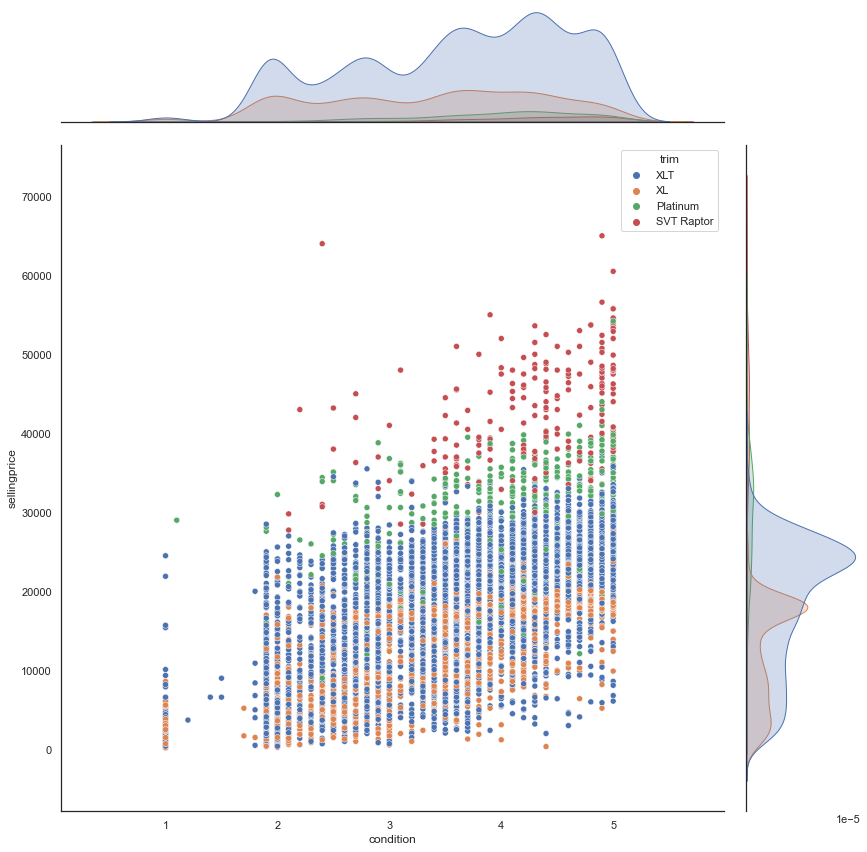

In [86]:
## Making jointplot to compare condition vs sellingprice, grouped by 'trim'

trimm = ["XL", "XLT", "Platinum", "SVT Raptor"]
sns.set_style("white")


sns.jointplot(
    x = 'condition',
    y = 'sellingprice',
    hue = 'trim',
    data = ford_150.query("trim == @trimm"),
    height = 12
)
plt.show()

## As we can see SVT Raptor has the highest selling price which is also correlated with condition with few outlyers

### Are there any "Deals"?

* Create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Then build a barplot looking at mean `diff_to_mmr` by `color`.

In [187]:
ford_150 = ford_150.assign(diff_to_mmr = ford_150['sellingprice'] - ford_150['mmr'])

In [188]:
ford_150.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bin,diff_to_mmr
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,500
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,3800


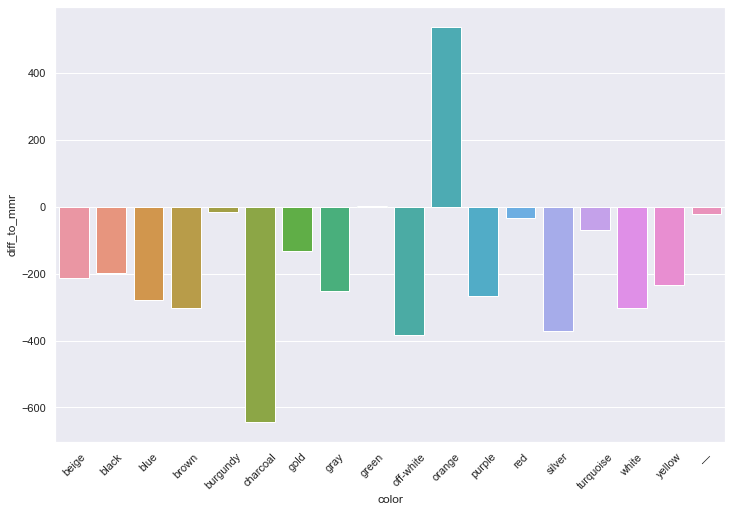

In [206]:
sns.set_style('darkgrid')


sns.barplot(
    x = 'color',
    y = 'diff_to_mmr',
    data = ford_150.sort_values(by = 'color'),
    ci = None,
)
plt.xticks(rotation = 45)
plt.show()

* Further filter the data to the trims below. Exclude the color 'orange' and look only at trucks from years between 2009 and 2014. 

In [207]:
trim_table = (
    ford_150.
        query("color != 'orange' and year >= 2009 and year <=2014 and trim == ['XLT','XL','SVT Raptor','Platinum']")
                 .pivot_table(
                     index = 'condition_bin',
                     columns = 'trim',
                     values = 'sellingprice',
                     aggfunc = 'mean'
                 )
)

In [208]:
trim_table

trim,Platinum,SVT Raptor,XL,XLT
condition_bin,,,,
1-1.5,29000.000000,NaN,NaN,NaN
1.5-2,25570.000000,NaN,8006.250000,15420.614035
2-2.5,25294.117647,37583.333333,12007.770270,16820.263158
2.5-3,23875.555556,36392.857143,12852.358974,18762.219828
3-3.5,26917.796610,36546.666667,15388.942308,20110.634328
3.5-4,26883.152174,40131.428571,16119.674556,21281.357759
4-4.5,29517.808219,42566.949153,17494.629156,23204.475831
4.5-5,33677.631579,45947.619048,18528.623188,25061.060065


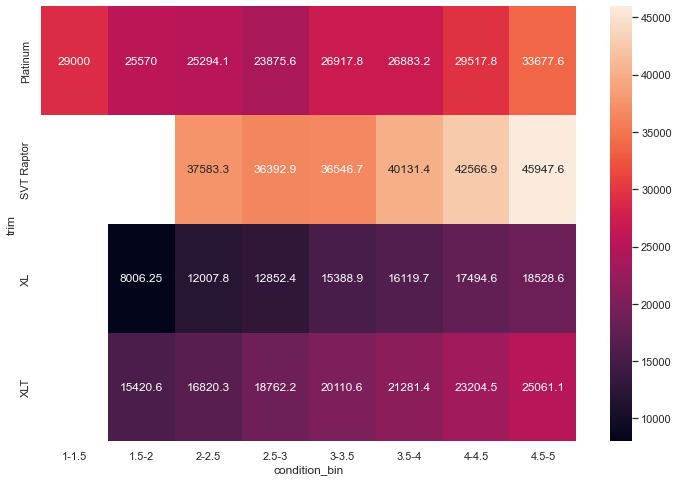

In [192]:
sns.heatmap(
    
    data = trim_table.T,
    fmt = 'g',
    annot = True
)
plt.show()

# Best state to buy trucks in?

* Ok, lets say I decided on the XLT model, it has more features than XL but is still quite affordable. Also filter out any trucks with a quality of less than 3.5.
* Build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

In [193]:
trim_table_quality = (ford_150.
        query("color != 'orange' and year >= 2009 and year <=2014 and trim == 'XLT' and condition >= 3.5"))

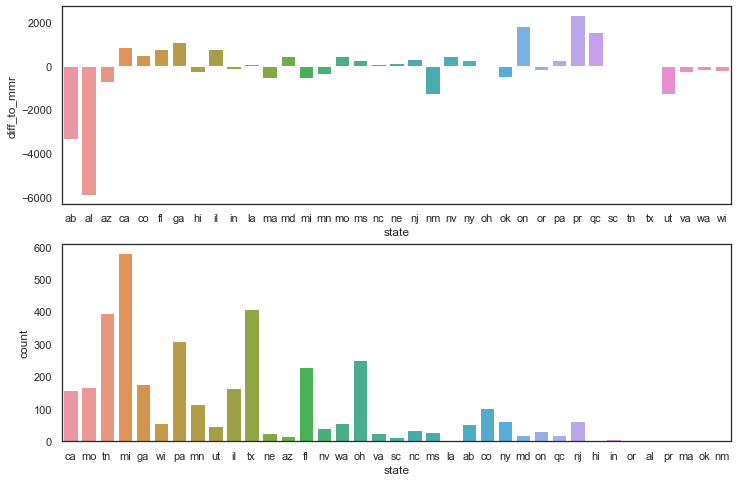

In [194]:
fig,ax = plt.subplots(2,1)

sns.barplot(
    x = 'state',
    y = 'diff_to_mmr',
    data = trim_table_quality.sort_values(by = 'state'),
    ci = None,
    ax = ax[0]
)



sns.countplot(
   x = trim_table_quality['state'],
   ax = ax[1] 
)
plt.show()

## We can see that in countries as ['ab','al','nm',ut] mean selling price is lower than recommanded by mmr, which can be good advice for place where should we look for potential buys.
## Couse in [ab,al,nm] is low amount of sellers will be good advice to find Offer in 'ut'

* Looks like Utah has a good amount of quantity and a low average price.

In [210]:
trim_table_quality['state'].unique()

array(['ca', 'mo', 'tn', 'mi', 'ga', 'wi', 'pa', 'mn', 'ut', 'il', 'tx',
       'ne', 'az', 'fl', 'nv', 'wa', 'oh', 'va', 'sc', 'nc', 'ms', 'la',
       'ab', 'co', 'ny', 'md', 'on', 'qc', 'nj', 'hi', 'in', 'or', 'al',
       'pr', 'ma', 'ok', 'nm'], dtype=object)

In [218]:
sales_grouped = (trim_table_quality.
                 query("state == 'ut' and trim == 'XLT' and condition > 3.5").
                     groupby('saledate').
                         agg({'diff_to_mmr':['mean','count']}).
                             droplevel(0, axis = 1)
)

In [217]:
sales_grouped

,mean,count
saledate,,
Wed Feb 04 2015 03:30:00 GMT-0800 (PST),-1400.000000,2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST),-1787.500000,12
Wed Feb 18 2015 03:30:00 GMT-0800 (PST),-377.777778,9
Wed Feb 25 2015 03:30:00 GMT-0800 (PST),-500.000000,6
Wed Jan 07 2015 11:30:00 GMT-0800 (PST),-2325.000000,2
Wed Jan 14 2015 03:30:00 GMT-0800 (PST),-1900.000000,1
Wed Jan 21 2015 03:30:00 GMT-0800 (PST),-900.000000,2
Wed Jun 03 2015 04:30:00 GMT-0700 (PDT),-1625.000000,2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT),-1957.142857,7


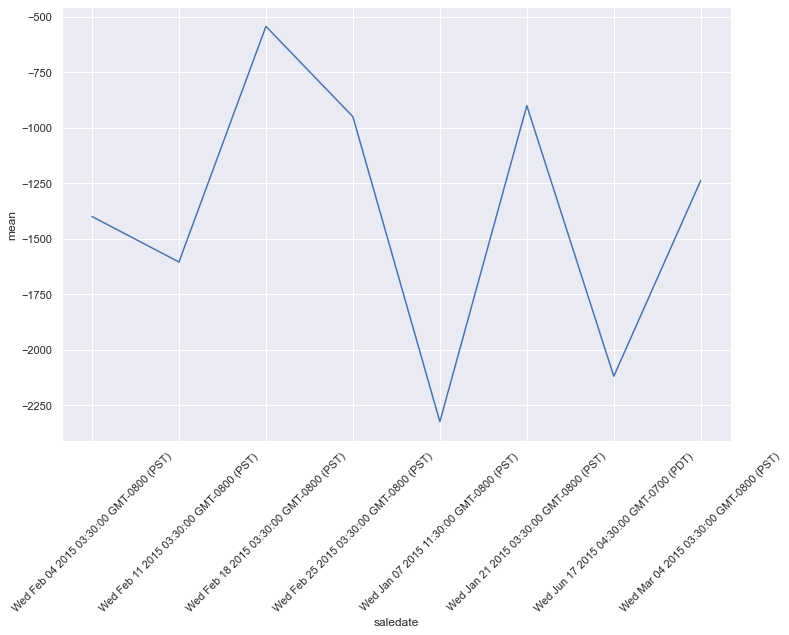

In [232]:
sns.lineplot(
    x = sales_grouped.index,
    y = 'mean',
    data = sales_grouped
)
plt.xticks(rotation = 45)
plt.show()